In [2]:
# Import the pandas and pathlib libraries
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from MCForecastTools import MCSimulation
import datetime as dt
import alpaca_trade_api as tradeapi
import json

%matplotlib inline

In [3]:
# Read in the config file containing the Alpaca keys
#Source for reading in json file: http://zetcode.com/python/simplejson/

with open('Resources/config.json') as f:

    config = json.load(f)
    
    #print('Read file in: {}'.format(config['config'])) #verify that the dictionary is in there

config_data = {
    "key_values": [config['config']['alpaca_api_key'],config['config']['alpaca_secret_key']]
}
id = ["alpaca_api_key", "alpaca_secret_key"]


# Create the DataFrame
alpaca_dataframe = pd.DataFrame(config_data, id)
alpaca_api_key = alpaca_dataframe.loc['alpaca_api_key','key_values']
alpaca_secret_key = alpaca_dataframe.loc['alpaca_secret_key','key_values']

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

today = pd.Timestamp("2020-11-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["PG","WMT","INTC","INTU", "MSFT", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


df_portfolio

INTC                                  INTU  \
                            open   high    low close    volume    open   
time                                                                     
2020-11-09 00:00:00-05:00  46.63  47.35  45.54  45.6  37598108  365.95   

                                                            ...     SPY  \
                             high     low   close   volume  ...    open   
time                                                        ...           
2020-11-09 00:00:00-05:00  377.15  359.31  359.93  1434019  ...  363.97   

                                                              WMT            \
                             high     low   close     volume open      high   
time                                                                          
2020-11-09 00:00:00-05:00  364.38  354.06  354.54  140613847  148  148.1992   

                                                     
                              low   close    volume  
time                                                 
2020-11-09 00:00:00-05:00  143.48  143.57  16697872  

[1 rows x 30 columns]

In [4]:
start_date = pd.Timestamp('1990-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-09', tz='America/New_York').isoformat()

In [5]:
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

INTC                                   INTU  \
                            open   high    low  close     volume   open   
time                                                                      
2008-01-02 00:00:00-05:00  26.30  26.34  24.95  25.34   80661924  31.51   
2008-01-03 00:00:00-05:00  25.39  25.40  24.38  24.68   82108007  31.13   
2008-01-04 00:00:00-05:00  23.47  23.60  22.35  22.60  163865969  31.27   
2008-01-07 00:00:00-05:00  22.76  23.03  22.36  22.88  102883395  30.24   
2008-01-08 00:00:00-05:00  22.94  23.13  22.23  22.27   77456327  31.38   

                                                         ...     SPY          \
                            high    low  close   volume  ...    open    high   
time                                                     ...                   
2008-01-02 00:00:00-05:00  31.94  30.96  31.13  3534903  ...  146.53  146.99   
2008-01-03 00:00:00-05:00  31.60  30.80  30.99  3131110  ...  144.92  145.49   
2008-01-04 00:00:00-05:00  31.27  30.00  30.11  2680338  ...  143.34  143.44   
2008-01-07 00:00:00-05:00  32.00  30.15  31.39  4184035  ...  141.81  142.23   
2008-01-08 00:00:00-05:00  31.50  30.50  30.50  3753966  ...  142.10  142.90   

                                                        WMT                \
                              low   close     volume   open   high    low   
time                                                                        
2008-01-02 00:00:00-05:00  143.88  144.55  175801806  47.41  47.63  46.46   
2008-01-03 00:00:00-05:00  144.12  144.46  111357758  46.72  46.86  46.23   
2008-01-04 00:00:00-05:00  140.92  140.93  195945264  45.91  46.37  45.37   
2008-01-07 00:00:00-05:00  140.10  141.46  220398905  45.80  46.81  45.59   
2008-01-08 00:00:00-05:00  138.63  138.81  303249870  46.59  47.08  45.88   

                                              
                           close      volume  
time                                          
2008-01-02 00:00:00-05:00  46.90  18534649.0  
2008-01-03 00:00:00-05:00  46.39  16871690.0  
2008-01-04 00:00:00-05:00  45.64  19295369.0  
2008-01-07 00:00:00-05:00  46.58  17999462.0  
2008-01-08 00:00:00-05:00  45.91  17766798.0  

[5 rows x 30 columns]

In [6]:
# Configuring a Monte Carlo simulation to forecast three years daily returns

num_sims =50
MC_3yrs = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims, 
    weights = [.10,.10,.20,.20,.20,.20],
    num_trading_days = 252*3
)

In [7]:
MC_3yrs.portfolio_data.head()

INTC                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2008-01-02 00:00:00-05:00  26.30  26.34  24.95  25.34   80661924          NaN   
2008-01-03 00:00:00-05:00  25.39  25.40  24.38  24.68   82108007    -0.026046   
2008-01-04 00:00:00-05:00  23.47  23.60  22.35  22.60  163865969    -0.084279   
2008-01-07 00:00:00-05:00  22.76  23.03  22.36  22.88  102883395     0.012389   
2008-01-08 00:00:00-05:00  22.94  23.13  22.23  22.27   77456327    -0.026661   

                            INTU                       ...     SPY          \
                            open   high    low  close  ...     low   close   
time                                                   ...                   
2008-01-02 00:00:00-05:00  31.51  31.94  30.96  31.13  ...  143.88  144.55   
2008-01-03 00:00:00-05:00  31.13  31.60  30.80  30.99  ...  144.12  144.46   
2008-01-04 00:00:00-05:00  31.27  31.27  30.00  30.11  ...  140.92  140.93   
2008-01-07 00:00:00-05:00  30.24  32.00  30.15  31.39  ...  140.10  141.46   
2008-01-08 00:00:00-05:00  31.38  31.50  30.50  30.50  ...  138.63  138.81   

                                                     WMT                       \
                              volume daily_return   open   high    low  close   
time                                                                            
2008-01-02 00:00:00-05:00  175801806          NaN  47.41  47.63  46.46  46.90   
2008-01-03 00:00:00-05:00  111357758    -0.000623  46.72  46.86  46.23  46.39   
2008-01-04 00:00:00-05:00  195945264    -0.024436  45.91  46.37  45.37  45.64   
2008-01-07 00:00:00-05:00  220398905     0.003761  45.80  46.81  45.59  46.58   
2008-01-08 00:00:00-05:00  303249870    -0.018733  46.59  47.08  45.88  45.91   

                                                    
                               volume daily_return  
time                                                
2008-01-02 00:00:00-05:00  18534649.0          NaN  
2008-01-03 00:00:00-05:00  16871690.0    -0.010874  
2008-01-04 00:00:00-05:00  19295369.0    -0.016167  
2008-01-07 00:00:00-05:00  17999462.0     0.020596  
2008-01-08 00:00:00-05:00  17766798.0    -0.014384  

[5 rows x 36 columns]

In [8]:
MC_3yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994021,1.003901,1.008640,1.004380,0.992001,1.007473,1.003301,0.998408,0.995735,1.011914,...,0.999023,0.991182,1.008494,0.988292,1.001463,1.001223,1.004280,1.007104,1.004973,1.004695
2,1.002300,1.001441,1.012258,1.002771,0.988733,1.008731,0.998508,1.004894,0.984421,1.018057,...,0.995722,0.982303,1.012110,0.991289,1.007286,1.003022,1.004171,1.023220,1.010255,1.004328
3,0.996136,0.998234,1.014875,1.011221,0.982883,1.022453,0.990973,1.004875,0.976054,1.013676,...,1.006588,0.976090,1.012132,0.998600,1.009870,1.020096,1.001074,1.027183,1.018727,1.006441
4,0.991654,1.008963,1.013356,1.011900,0.983481,1.026526,0.994092,1.020061,0.981809,1.024213,...,1.010024,0.971691,1.008466,1.006304,1.002849,1.018842,0.994135,1.026434,1.020004,1.010428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.441025,1.100126,1.480471,1.792110,1.257012,1.727132,1.013319,0.796730,1.600525,1.961107,...,1.683395,1.373574,1.410109,1.376467,1.830894,1.263571,1.461637,1.416456,1.824261,1.546130
753,1.440538,1.099298,1.492275,1.801372,1.247888,1.718372,1.024648,0.794310,1.610148,1.954714,...,1.702839,1.373158,1.393683,1.383331,1.841195,1.258361,1.453143,1.411015,1.822616,1.556429
754,1.431250,1.103968,1.492091,1.818231,1.258512,1.715027,1.029148,0.793646,1.612606,1.949740,...,1.716653,1.381077,1.406603,1.378655,1.831459,1.248250,1.474270,1.406481,1.828787,1.565668
755,1.409724,1.112928,1.509966,1.805850,1.253758,1.710034,1.029772,0.786929,1.599005,1.948988,...,1.721313,1.381035,1.401150,1.379243,1.848331,1.243282,1.473234,1.397600,1.846466,1.562427


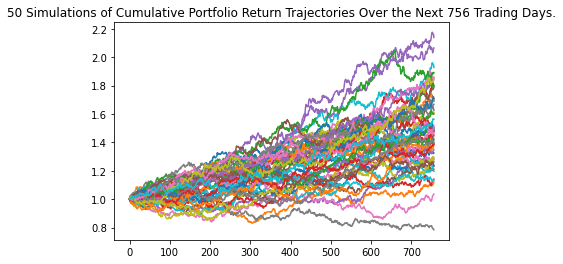

In [9]:
line_plot = MC_3yrs.plot_simulation()
line_plot.get_figure().savefig("MC_3yrs_sim_plot.png", bbox_inches="tight")

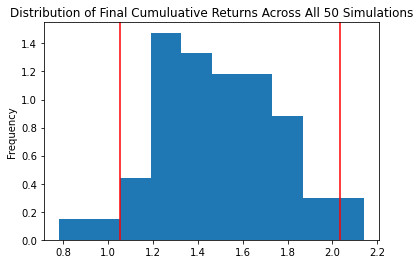

In [10]:
dist_plot = MC_3yrs.plot_distribution()

In [11]:
sum_tbl = MC_3yrs.summarize_cumulative_return()
sum_tbl

count           50.000000
mean             1.493000
std              0.277268
min              0.784371
25%              1.284130
50%              1.470902
75%              1.693263
max              2.139301
95% CI Lower     1.055315
95% CI Upper     2.034097
Name: 756, dtype: float64

In [12]:
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(initial_investment*sum_tbl["95% CI Lower"],2)
ci_upper = round(initial_investment*sum_tbl["95% CI Upper"],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $21106.3 and $40681.93


In [13]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns:
MC_5yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.10,.20,.20,.20,.20],
    num_simulation = 50,
    num_trading_days = 252*5
)
MC_5yrs.portfolio_data.head()

INTC                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2008-01-02 00:00:00-05:00  26.30  26.34  24.95  25.34   80661924          NaN   
2008-01-03 00:00:00-05:00  25.39  25.40  24.38  24.68   82108007    -0.026046   
2008-01-04 00:00:00-05:00  23.47  23.60  22.35  22.60  163865969    -0.084279   
2008-01-07 00:00:00-05:00  22.76  23.03  22.36  22.88  102883395     0.012389   
2008-01-08 00:00:00-05:00  22.94  23.13  22.23  22.27   77456327    -0.026661   

                            INTU                       ...     SPY          \
                            open   high    low  close  ...     low   close   
time                                                   ...                   
2008-01-02 00:00:00-05:00  31.51  31.94  30.96  31.13  ...  143.88  144.55   
2008-01-03 00:00:00-05:00  31.13  31.60  30.80  30.99  ...  144.12  144.46   
2008-01-04 00:00:00-05:00  31.27  31.27  30.00  30.11  ...  140.92  140.93   
2008-01-07 00:00:00-05:00  30.24  32.00  30.15  31.39  ...  140.10  141.46   
2008-01-08 00:00:00-05:00  31.38  31.50  30.50  30.50  ...  138.63  138.81   

                                                     WMT                       \
                              volume daily_return   open   high    low  close   
time                                                                            
2008-01-02 00:00:00-05:00  175801806          NaN  47.41  47.63  46.46  46.90   
2008-01-03 00:00:00-05:00  111357758    -0.000623  46.72  46.86  46.23  46.39   
2008-01-04 00:00:00-05:00  195945264    -0.024436  45.91  46.37  45.37  45.64   
2008-01-07 00:00:00-05:00  220398905     0.003761  45.80  46.81  45.59  46.58   
2008-01-08 00:00:00-05:00  303249870    -0.018733  46.59  47.08  45.88  45.91   

                                                    
                               volume daily_return  
time                                                
2008-01-02 00:00:00-05:00  18534649.0          NaN  
2008-01-03 00:00:00-05:00  16871690.0    -0.010874  
2008-01-04 00:00:00-05:00  19295369.0    -0.016167  
2008-01-07 00:00:00-05:00  17999462.0     0.020596  
2008-01-08 00:00:00-05:00  17766798.0    -0.014384  

[5 rows x 36 columns]

In [14]:
MC_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007909,1.006683,1.000498,0.998846,1.001397,1.012970,1.006898,1.006348,0.993445,1.003214,...,0.994646,0.999500,1.008699,0.991890,1.005992,0.998746,1.008924,0.992992,1.002216,1.000644
2,0.994104,1.012485,1.004159,0.991877,1.000243,1.005512,1.005759,1.018175,0.993671,1.004180,...,0.981575,1.012923,1.017141,0.987700,1.016889,0.999216,1.005733,0.996249,1.003001,0.999011
3,0.996313,1.004756,1.006115,0.998110,0.996058,1.004119,1.013158,1.016562,1.003853,1.013847,...,0.974773,1.016295,1.012592,0.989478,1.025106,1.006664,1.005905,0.996784,1.010371,1.003159
4,0.994650,1.009995,1.002730,0.994030,1.002060,1.011125,1.029739,1.008729,0.998195,1.033568,...,0.967936,1.016162,1.020713,0.993804,1.019217,1.007043,1.009583,1.002849,1.022695,1.005854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.509119,2.525895,1.701955,2.058523,1.775801,2.507552,1.857886,2.071444,1.739597,3.175834,...,1.545929,2.002224,2.400784,1.945563,1.971998,2.388586,2.566403,2.358764,1.910401,1.606214
1257,1.487193,2.535672,1.690446,2.076475,1.783091,2.525464,1.863464,2.080838,1.734085,3.194926,...,1.566944,1.994965,2.417660,1.939765,1.971285,2.412099,2.581162,2.376224,1.899170,1.610752
1258,1.473536,2.548892,1.696030,2.080500,1.794767,2.508645,1.859799,2.090190,1.737482,3.188901,...,1.574668,2.009471,2.409492,1.971928,1.966861,2.393598,2.583275,2.378905,1.907655,1.606134
1259,1.475470,2.552184,1.694869,2.064165,1.803035,2.530796,1.856780,2.096466,1.743172,3.204980,...,1.586607,2.002625,2.400579,1.988943,1.937171,2.411355,2.587155,2.381393,1.900527,1.612130


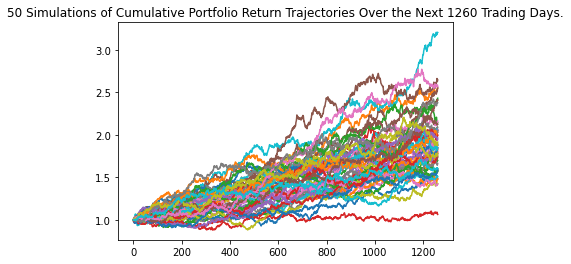

In [15]:
#Plotting the Probability distribution:

line_plot = MC_5yrs.plot_simulation()
line_plot.get_figure().savefig("MC_5yrs_sim_plot.png", bbox_inches="tight")

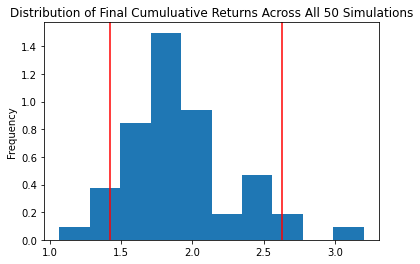

In [16]:
# Plot probability distribution and confidence intervals

dist_plot = MC_5yrs.plot_distribution()

In [17]:
#Fetching the summary satistics table for 5YRS cummulative returns:
sum_tbl_5yrs = MC_5yrs.summarize_cumulative_return()
sum_tbl_5yrs

count           50.000000
mean             1.918504
std              0.380775
min              1.066680
25%              1.673517
50%              1.850782
75%              2.059028
max              3.202679
95% CI Lower     1.424964
95% CI Upper     2.627900
Name: 1260, dtype: float64

In [18]:
initial_investment_5yrs= 20000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_5yrs = round(initial_investment_5yrs*sum_tbl_5yrs["95% CI Lower"],2)
ci_upper_5yrs = round(initial_investment_5yrs*sum_tbl_5yrs["95% CI Upper"],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yrs} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs} and ${ci_upper_5yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $28499.28 and $52558.01


In [19]:
initial_investment_5yrs= 20000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_5yrs = round(initial_investment_5yrs*sum_tbl_5yrs["95% CI Lower"],2)
ci_upper_5yrs = round(initial_investment_5yrs*sum_tbl_5yrs["95% CI Upper"],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yrs} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs} and ${ci_upper_5yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $28499.28 and $52558.01


In [20]:
# Configure a Monte Carlo simulation to forecast 10 years daily returns with the changes in weights:

MC_10yrs = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 50, 
    weights = [.10,.10,.30,.20,.10,.20,],
    num_trading_days = 252*10
)
MC_10yrs.portfolio_data.head().dropna()

INTC                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2008-01-03 00:00:00-05:00  25.39  25.40  24.38  24.68   82108007    -0.026046   
2008-01-04 00:00:00-05:00  23.47  23.60  22.35  22.60  163865969    -0.084279   
2008-01-07 00:00:00-05:00  22.76  23.03  22.36  22.88  102883395     0.012389   
2008-01-08 00:00:00-05:00  22.94  23.13  22.23  22.27   77456327    -0.026661   

                            INTU                       ...     SPY          \
                            open   high    low  close  ...     low   close   
time                                                   ...                   
2008-01-03 00:00:00-05:00  31.13  31.60  30.80  30.99  ...  144.12  144.46   
2008-01-04 00:00:00-05:00  31.27  31.27  30.00  30.11  ...  140.92  140.93   
2008-01-07 00:00:00-05:00  30.24  32.00  30.15  31.39  ...  140.10  141.46   
2008-01-08 00:00:00-05:00  31.38  31.50  30.50  30.50  ...  138.63  138.81   

                                                     WMT                       \
                              volume daily_return   open   high    low  close   
time                                                                            
2008-01-03 00:00:00-05:00  111357758    -0.000623  46.72  46.86  46.23  46.39   
2008-01-04 00:00:00-05:00  195945264    -0.024436  45.91  46.37  45.37  45.64   
2008-01-07 00:00:00-05:00  220398905     0.003761  45.80  46.81  45.59  46.58   
2008-01-08 00:00:00-05:00  303249870    -0.018733  46.59  47.08  45.88  45.91   

                                                    
                               volume daily_return  
time                                                
2008-01-03 00:00:00-05:00  16871690.0    -0.010874  
2008-01-04 00:00:00-05:00  19295369.0    -0.016167  
2008-01-07 00:00:00-05:00  17999462.0     0.020596  
2008-01-08 00:00:00-05:00  17766798.0    -0.014384  

[4 rows x 36 columns]

In [21]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns:
MC_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001686,0.998838,1.014463,0.997871,0.996721,1.009817,1.003859,1.000319,1.003691,1.007558,...,1.009719,0.999996,0.989614,1.001458,0.978259,1.004007,0.999960,1.005298,0.993557,1.008368
2,1.001436,0.996896,1.007334,1.001341,0.994250,1.011584,0.997885,0.996543,1.006952,1.010633,...,1.010788,1.009732,0.983817,0.996881,0.973570,0.999664,0.989037,1.002745,0.988075,1.015336
3,1.009053,0.999702,1.007330,1.003674,0.990592,1.007107,0.993154,1.010421,1.005389,1.009224,...,1.021717,1.014489,0.991938,0.988173,0.968767,0.995899,0.997975,1.008627,0.989453,1.013562
4,1.023422,0.984107,1.004092,1.004320,0.987333,1.004894,0.988187,1.009096,0.997619,0.994724,...,1.023190,1.010212,0.989928,0.977484,0.956551,0.995184,1.005590,1.013604,0.978554,1.004714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.257949,2.754849,4.018961,4.655573,4.270789,5.381168,2.062042,5.129333,3.666852,2.168814,...,4.620114,5.235619,2.932527,3.110491,2.062119,4.104900,2.590285,1.907270,4.604689,2.238078
2517,3.198898,2.767564,3.989185,4.672190,4.265921,5.389626,2.072702,5.067352,3.692272,2.176132,...,4.645012,5.187947,2.926062,3.131632,2.045598,4.087637,2.581303,1.909526,4.582311,2.242328
2518,3.188012,2.739945,3.956672,4.666487,4.291812,5.418175,2.052524,5.068388,3.711592,2.196431,...,4.563523,5.162371,2.925329,3.150764,2.047691,4.093952,2.541563,1.904129,4.543807,2.247787
2519,3.168422,2.732616,3.981964,4.696628,4.337625,5.446215,2.055386,5.047817,3.739823,2.196747,...,4.540412,5.174625,2.925901,3.183977,2.056205,4.098871,2.575080,1.898268,4.513557,2.219389


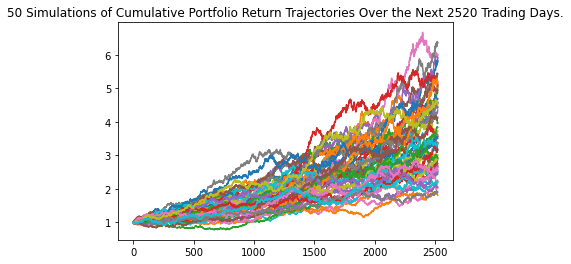

In [22]:
#plotting the simulation outcomes:'''

line_plot_10yrs = MC_10yrs.plot_simulation()
line_plot.get_figure().savefig("MC_10yrs_sim_plot.png", bbox_inches="tight")

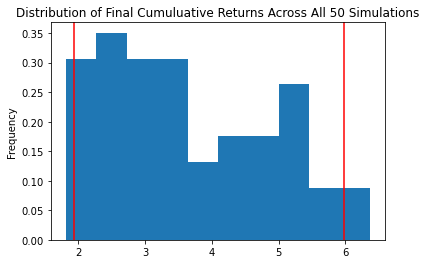

In [23]:
#Plotting the probality distribution and confidence intervals:
dist_plot_10yrs = MC_10yrs.plot_distribution()

In [24]:
#Fetching the summary statistics of cumulative outcomes for 10 yrs:

sum_tbl_10yrs = MC_10yrs.summarize_cumulative_return()
sum_tbl_10yrs

count           50.000000
mean             3.653249
std              1.228365
min              1.810844
25%              2.655935
50%              3.373713
75%              4.572585
max              6.374043
95% CI Lower     1.933514
95% CI Upper     5.986055
Name: 2520, dtype: float64

In [25]:
#Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 over 10yrs :

initial_investment_10yrs= 20000

ci_lower_10yrs = round(initial_investment_10yrs*sum_tbl_10yrs["95% CI Lower"],2)
ci_upper_10yrs = round(initial_investment_10yrs*sum_tbl_10yrs["95% CI Upper"],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yrs} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10yrs} and ${ci_upper_10yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $38670.29 and $119721.09
